# Channel Package: Example
## Use of the channel class to simulate radar pulse compression 
### Other Features Demonstration
* Channels time series generation
* Channels function manipulaltion
* Automatic prefix scaling in plots

In [1]:
import numpy as np
from channel.generator import chirp, random_normal
from jumble.units_prefixed import us, ms, MHz, ns, GHz, nW, mW
import figs

### Parameters

In [2]:
dt    = 10*ns # sampling time step
sigma = .01   # random Gaussian noise std
t0    = 20*us # transmitted signal chirp time position
t1    = 80*us # return ignal delay
Dt    = 3*us  # chirp time length 

### Create a Channel With a Linear Frequency Chirp

In [3]:
cp = chirp(T=Dt, DT=100*us, f0=10*MHz, f1=1*GHz, dt=dt)

### Create Channel TX with a Linear Noisy Frequency Chirp

In [4]:
TX  = random_normal(100*us,dt=dt, sigma=sigma, names =["time", "TX"], descriptions=["time", "TX Amplitude"], unitss=["s", "W"])*mW
TX.sub_add(t0, cp*mW)
TX

Channel TX, type constant sampling, @ 0x21b74c2a6b0
  name              : TX [W], TX Amplitude
  xname             : time [s], time
  step Min, Avg, Max: 10 ns, 10 ns, 10 ns
  start stop        : (0 s, 99.99 μs)
  number of samples : 10000
  channel type      : constant sampling

### Create Channel RX with a Delayed Return Signal Burried into The Noise

In [5]:
RX  = random_normal(100*us,dt=dt,sigma=sigma, names =["time", "RX"], descriptions=["time", "RX Amplitude"], unitss=["s", "W"])*nW
RX.sub_add(t1, -cp/100*nW)

### Create a Channel RXClean with Clean Delayed Return Signal

In [6]:
RXClean = RX.like(np.zeros(RX.size), name ="RX_clean", description="RX Clean Amplitude")*nW
RXClean.sub_add(t1, -cp/100*nW)

### Apply the Matched Filtering

In [7]:
conv = RX.matched_filter(-cp)
conv.unitss= ["s","W^2"]

conv

Channel matched_filtered.RX, type constant sampling, @ 0x21b74c2b460
  name              : matched_filtered.RX [W^2], filter of RX Amplitude
  xname             : time [s], time
  step Min, Avg, Max: 10 ns, 10 ns, 10 ns
  start stop        : (0 s, 99.99 μs)
  number of samples : 10000
  channel type      : constant sampling

### Illustrate Result of Matched Filtering

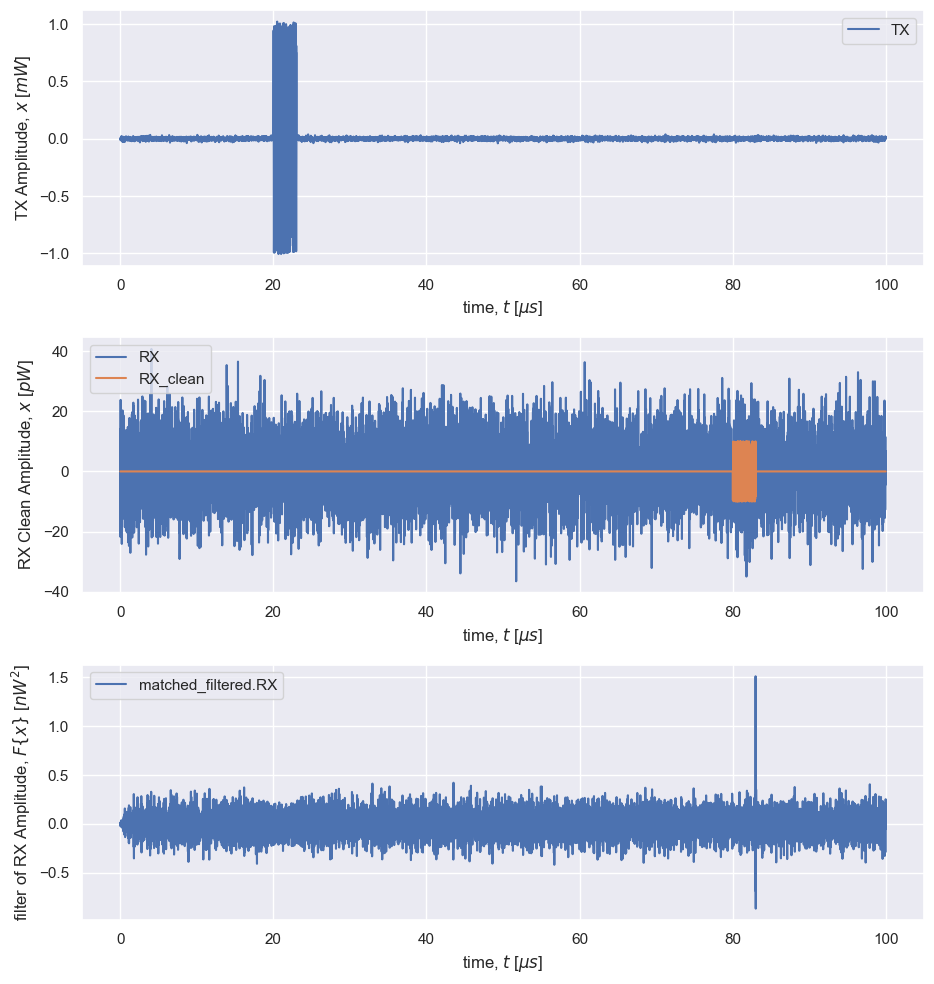

In [8]:
fig, ax = figs.axes(3)
TX.plot(axis = ax[0])
RX.plot(axis = ax[1])
RXClean.plot(axis = ax[1])
_ = conv.plot(axis = ax[2])

### Plot Detection Peak

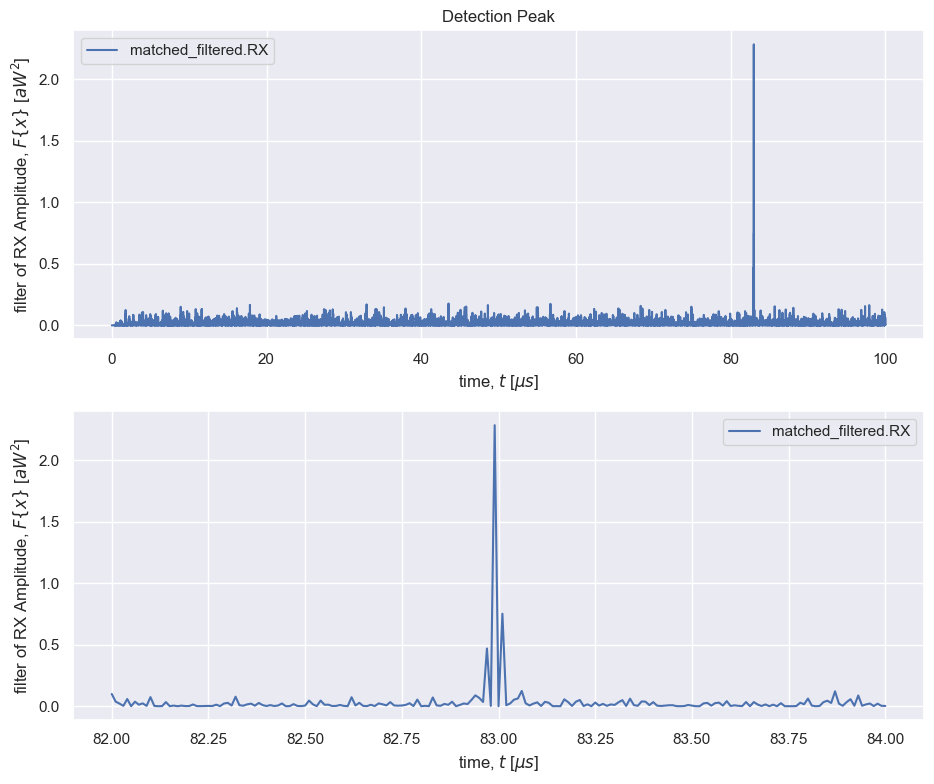

In [9]:

CV = conv**2

fig, ax = figs.axes(2)

CV.plot(axis=ax[0], title="Detection Peak")

_ = CV[82.0*us:84.0*us].plot(axis=ax[1])